In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from classifier_selector import Classifier_selector
from sbs import SequentialBackwardSelection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mpa import mpa
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


In [2]:
''' Testing phase '''

' Testing phase '

In [3]:
classifier_selecting = Classifier_selector()

In [4]:
wdbc_df = pd.read_csv("./Datasets/wdbc.csv", header = None)
num_features = wdbc_df.shape[1] - 1  # Assuming the last column is the label
feature_names = [f'feature{i+1}' for i in range(num_features)] + ['label']
wdbc_df.columns = feature_names
dict1 = {'B':0,'M':1}
wdbc_df = wdbc_df.replace({'label':dict1})
wdbc_df['label'] = wdbc_df['label'].apply(pd.to_numeric, errors = 'coerce')
wdbc_df.drop(columns = "feature1", inplace = True)
wdbc_df = shuffle(wdbc_df, random_state=15)

/tmp/ipykernel_80294/3309096960.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wdbc_df = wdbc_df.replace({'label':dict1})


In [5]:
wdbc_df.tail()

,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,label
85,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.08795,0.2132,0.06022,...,27.68,152.20,1603.0,0.1398,0.2089,0.3157,0.16420,0.3695,0.08579,1
199,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130,1
156,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,0.1971,0.06166,...,25.11,132.90,1302.0,0.1418,0.3498,0.3583,0.15150,0.2463,0.07738,1
384,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,0.1617,0.05594,...,17.37,96.59,623.7,0.1166,0.2685,0.2866,0.09173,0.2736,0.07320,0
456,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,38.81,86.04,527.8,0.1406,0.2031,0.2923,0.06835,0.2884,0.07220,0


In [6]:
train_df, test_df = train_test_split(wdbc_df, test_size = 0.2, random_state = 11)

X_train = train_df.drop("label", axis = 1)
y_train = train_df["label"]
X_test = test_df.drop("label", axis = 1)
y_test = test_df["label"]

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

Best Cross-validation Score: 0.948875692006585

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.95      1.00      0.98        40

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



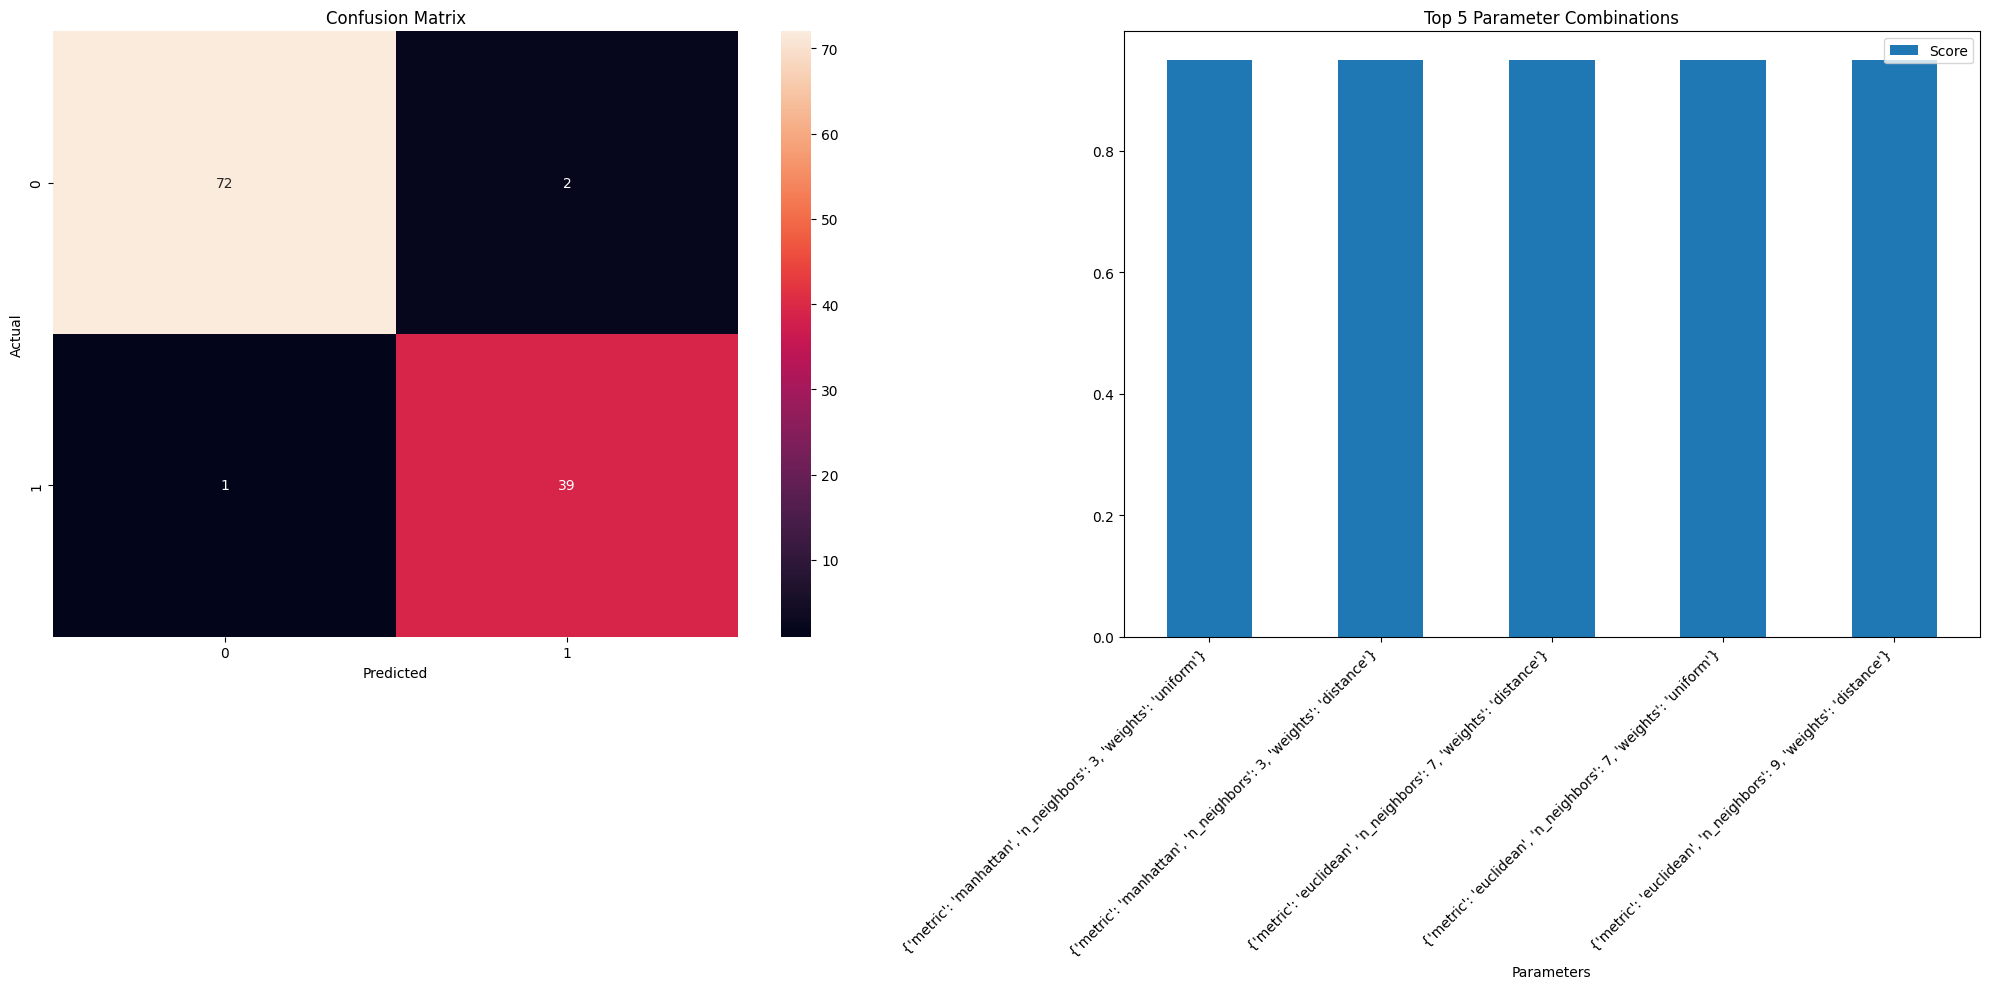

In [7]:
results_knn = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'knn')

print("\nBest Parameters:", results_knn['best_parameters'])
print("\nBest Cross-validation Score:", results_knn['best_score'])
print("\nFeature Importances:", results_knn['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_knn['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [8]:
knn = KNeighborsClassifier(**results_knn['best_parameters'])

sbs_knn = SequentialBackwardSelection(estimator=knn,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_knn.fit(X_train, X_test, y_train, y_test)


Removed feature: feature23
Current performance: 0.99123
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature2
Current performance: 0.99123
Remaining features: ['feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature3
Current performance: 0.99123
Remaining features: ['feature4', 'feature5', 'feature6', 'fea

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000, 'penalty': 'elasticnet'}

Best Cross-validation Score: 0.9554549001871214

Feature Importances: {'feature2': np.float64(0.18497559332153682), 'feature3': np.float64(0.09078870729083252), 'feature4': np.float64(0.20725061595498745), 'feature5': np.float64(0.17525202193859202), 'feature6': np.float64(0.431454343911337), 'feature7': np.float64(0.6852605487952701), 'feature8': np.float64(0.470402612764994), 'feature9': np.float64(0.473639925735661), 'feature10': np.float64(0.17705159771400059), 'feature11': np.float64(0.6422208270792125), 'feature12': np.float64(1.1654516170235507), 'feature13': np.float64(0.6978340135382768), 'feature14': np.float64(0.474168467230811), 'feature15': np.float64(0.9074760000698939), 'feature16': np.float64(0.6394969440056981), 'feature17': np.float64(0.06297587237058283), 'feature18': np.float64(0.5955870451518752), 'feature19': np

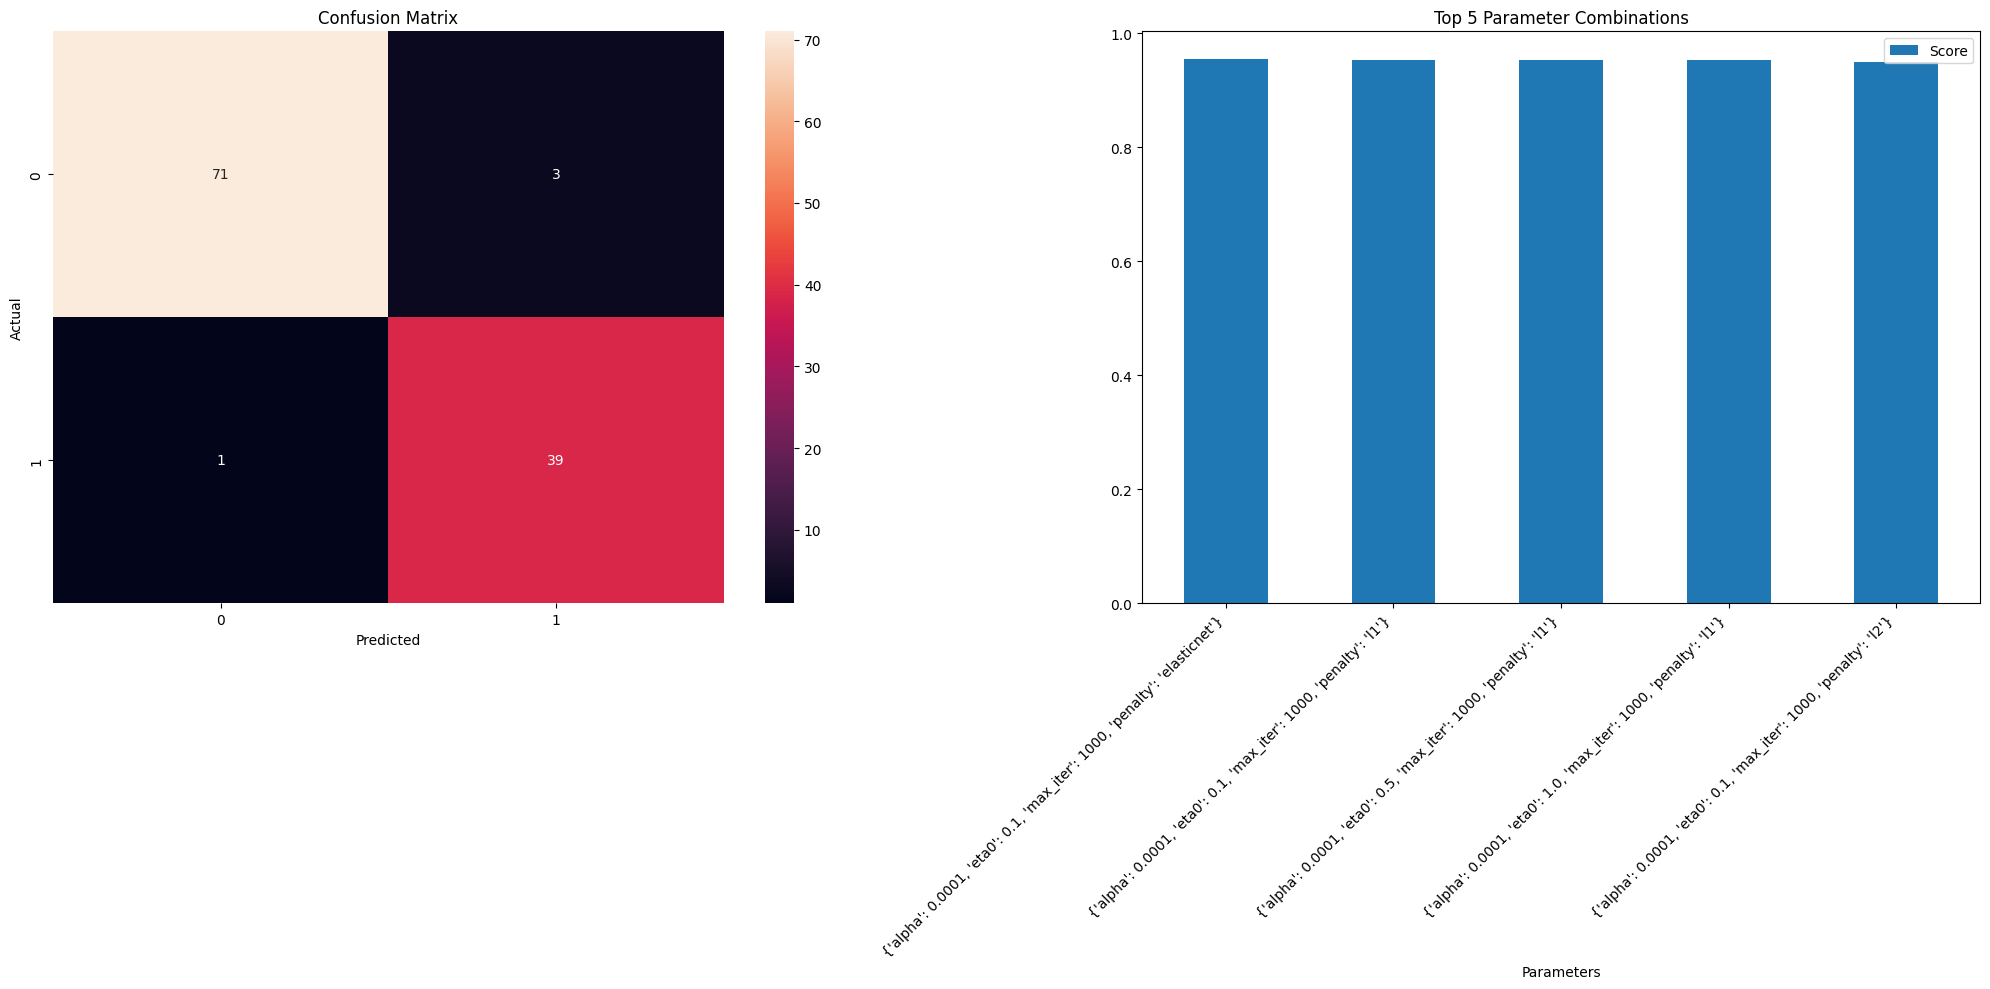

In [9]:
results_perceptron = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'perceptron')

print("\nBest Parameters:", results_perceptron['best_parameters'])
print("\nBest Cross-validation Score:", results_perceptron['best_score'])
print("\nFeature Importances:", results_perceptron['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_perceptron['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [10]:
perceptron = Perceptron(**results_perceptron['best_parameters'])

sbs_perceptron = SequentialBackwardSelection(estimator=perceptron,
                                             min_features = 3,
                                             scoring_metric=accuracy_score,
                                             scale_features=True,
                                             verbose=True)
sbs_perceptron.fit(X_train, X_test, y_train, y_test)


Removed feature: feature19
Current performance: 0.97368
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature2
Current performance: 0.97368
Remaining features: ['feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature18
Current performance: 0.97368
Remaining features: ['feature3', 'feature4', 'feature5', 'fe

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Best Cross-validation Score: 0.9350616437360149

Feature Importances: {'feature2': np.float64(0.03777841754318587), 'feature3': np.float64(0.01636334862358521), 'feature4': np.float64(0.05053151341010872), 'feature5': np.float64(0.038329415515521), 'feature6': np.float64(0.00522409508411805), 'feature7': np.float64(0.012445741638257646), 'feature8': np.float64(0.049734900421033665), 'feature9': np.float64(0.11146777361892349), 'feature10': np.float64(0.00395286234533643), 'feature11': np.float64(0.0038727171418093845), 'feature12': np.float64(0.015647470102573783), 'feature13': np.float64(0.004988621356320331), 'feature14': np.float64(0.010552418318024899), 'feature15': np.float64(0.03064828425168364), 'feature16': np.float64(0.004894961724306873), 'feature17': np.float64(0.0046490936648788395), 'feature18': np.float64(0

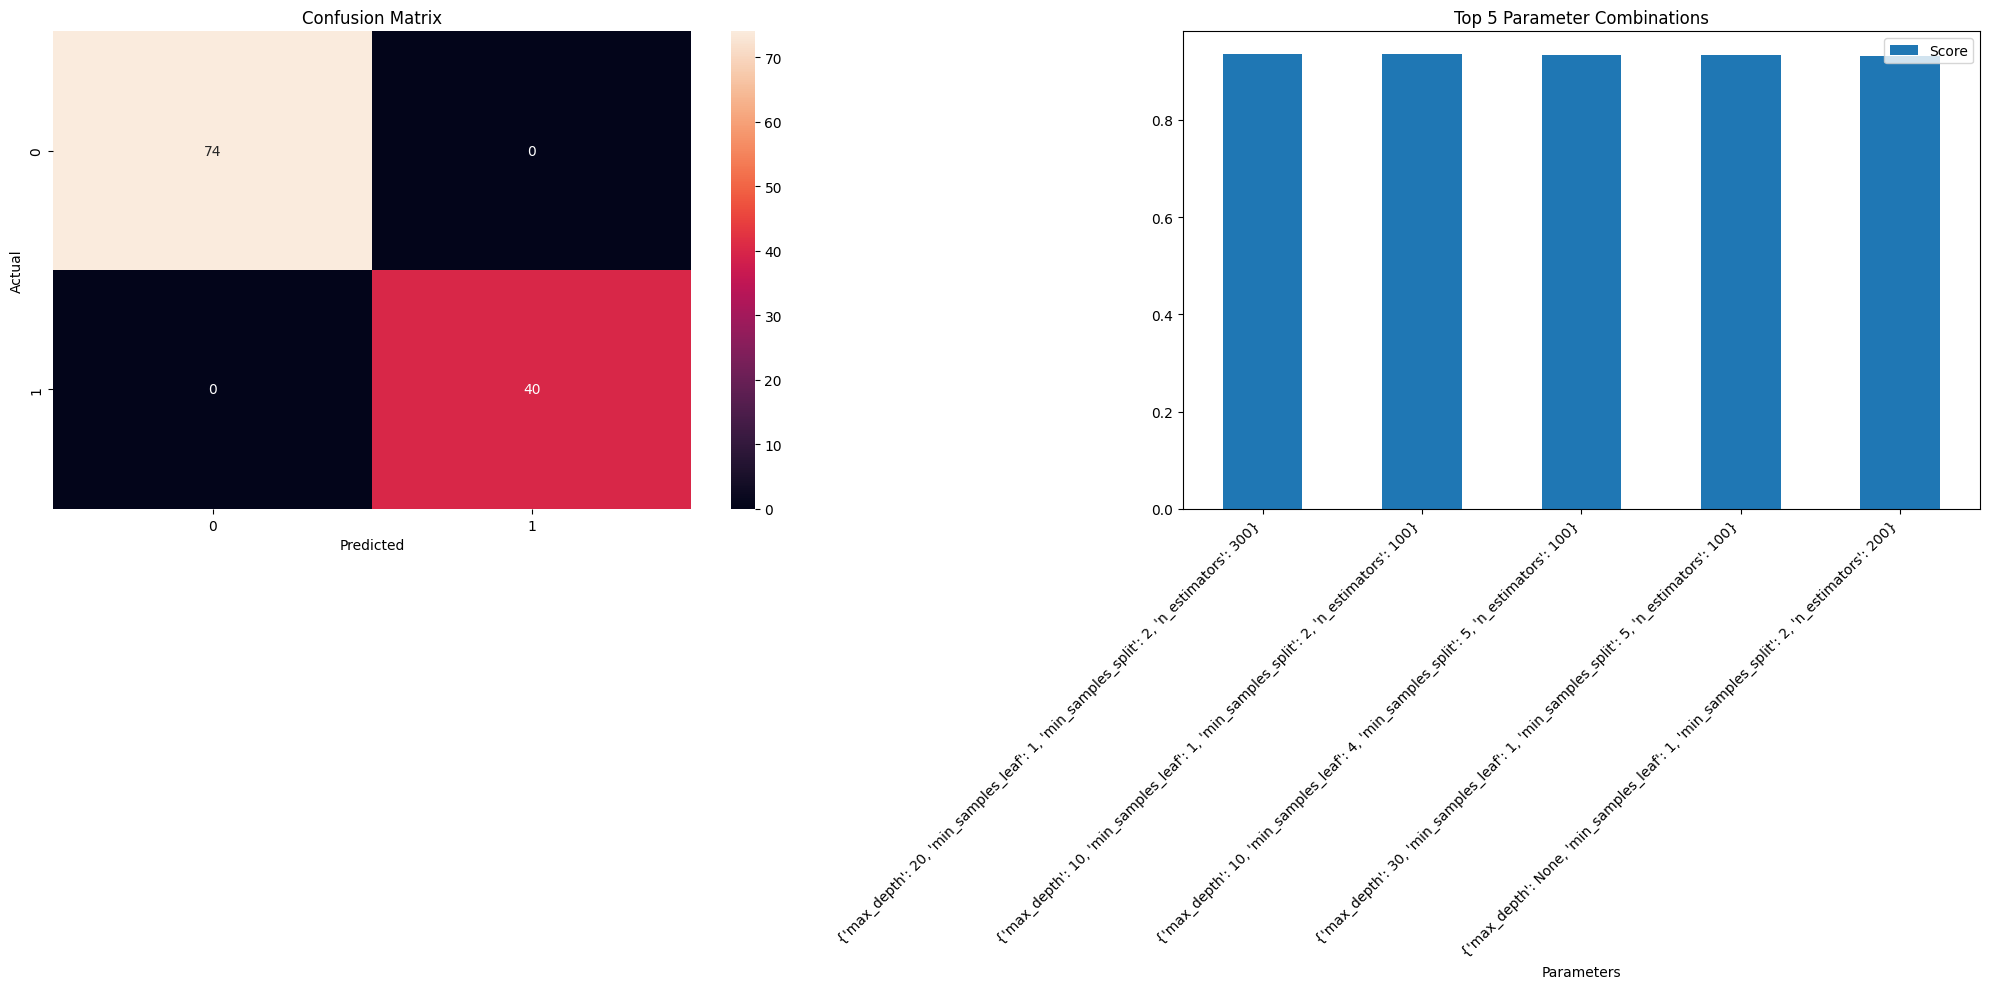

In [11]:
results_rf = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'rf')

print("\nBest Parameters:", results_rf['best_parameters'])
print("\nBest Cross-validation Score:", results_rf['best_score'])
print("\nFeature Importances:", results_rf['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_rf['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [12]:
rf = RandomForestClassifier(**results_rf['best_parameters'])

sbs_rf = SequentialBackwardSelection(estimator=rf,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_rf.fit(X_train, X_test, y_train, y_test)


Removed feature: feature9
Current performance: 0.96491
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature2
Current performance: 0.96491
Remaining features: ['feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature27
Current performance: 0.96491
Remaining features: ['feature3', 'feature4', 'feature5', 'f

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best Cross-validation Score: 0.9116104016104016

Feature Importances: {'feature2': np.float64(0.0), 'feature3': np.float64(0.026193974240136256), 'feature4': np.float64(0.0), 'feature5': np.float64(0.06668597869156574), 'feature6': np.float64(0.0), 'feature7': np.float64(0.0), 'feature8': np.float64(0.0), 'feature9': np.float64(0.6061459006909036), 'feature10': np.float64(0.0), 'feature11': np.float64(0.0), 'feature12': np.float64(0.0), 'feature13': np.float64(0.0), 'feature14': np.float64(0.0), 'feature15': np.float64(0.014079855575779038), 'feature16': np.float64(0.0), 'feature17': np.float64(0.01849541928937454), 'feature18': np.float64(0.0), 'feature19': np.float64(0.0), 'feature20': np.float64(0.01994545337101356), 'feature21': np.float64(0.0), 'feature22': np.float64(0.022041836592982384), 'feature23': np.float64

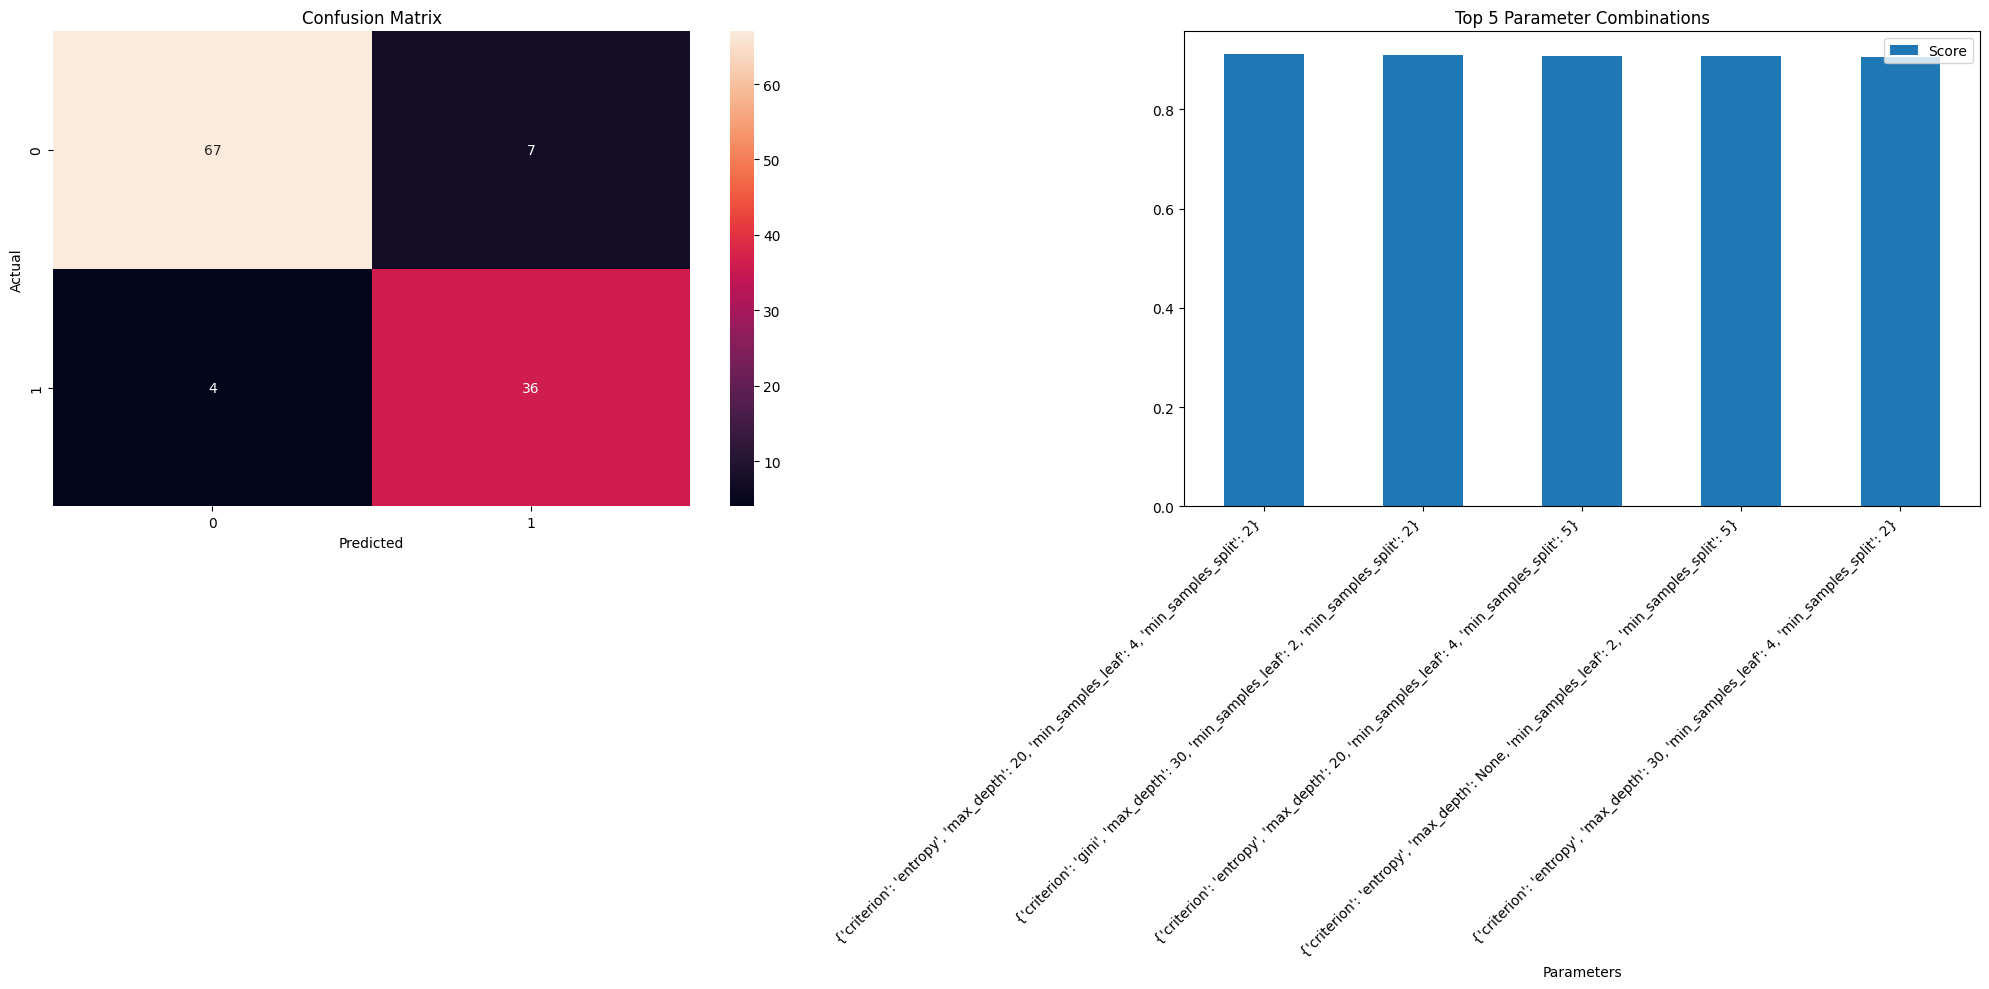

In [13]:
results_dt = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'dt')

print("\nBest Parameters:", results_dt['best_parameters'])
print("\nBest Cross-validation Score:", results_dt['best_score'])
print("\nFeature Importances:", results_dt['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_dt['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [14]:
dt = DecisionTreeClassifier(**results_dt['best_parameters'])

sbs_dt = SequentialBackwardSelection(estimator=dt,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_dt.fit(X_train, X_test, y_train, y_test)


Removed feature: feature3
Current performance: 0.94737
Remaining features: ['feature2', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature22
Current performance: 0.95614
Remaining features: ['feature2', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature18
Current performance: 0.96491
Remaining features: ['feature2', 'feature4', 'feature5', 'f

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Best Cross-validation Score: 0.9696927947674217

Feature Importances: {'feature2': np.float64(0.2561057007650175), 'feature3': np.float64(0.258702188357748), 'feature4': np.float64(0.2530884451883685), 'feature5': np.float64(0.25536363118138755), 'feature6': np.float64(0.11815040638854477), 'feature7': np.float64(0.14626664754204174), 'feature8': np.float64(0.3181445822848149), 'feature9': np.float64(0.34137700109200864), 'feature10': np.float64(0.05762555042734265), 'feature11': np.float64(0.19601812708299277), 'feature12': np.float64(0.318635256776539), 'feature13': np.float64(0.09737794983414498), 'feature14': np.float64(0.31248705367949847), 'feature15': np.float64(0.2468285662634404), 'feature16': np.float64(0.12403570040533317), 'feature17': np.float64(0.29411550765070504), 'feature18': np.float64(0.036352824392278354), 'feature19': np.float64(0.1238000

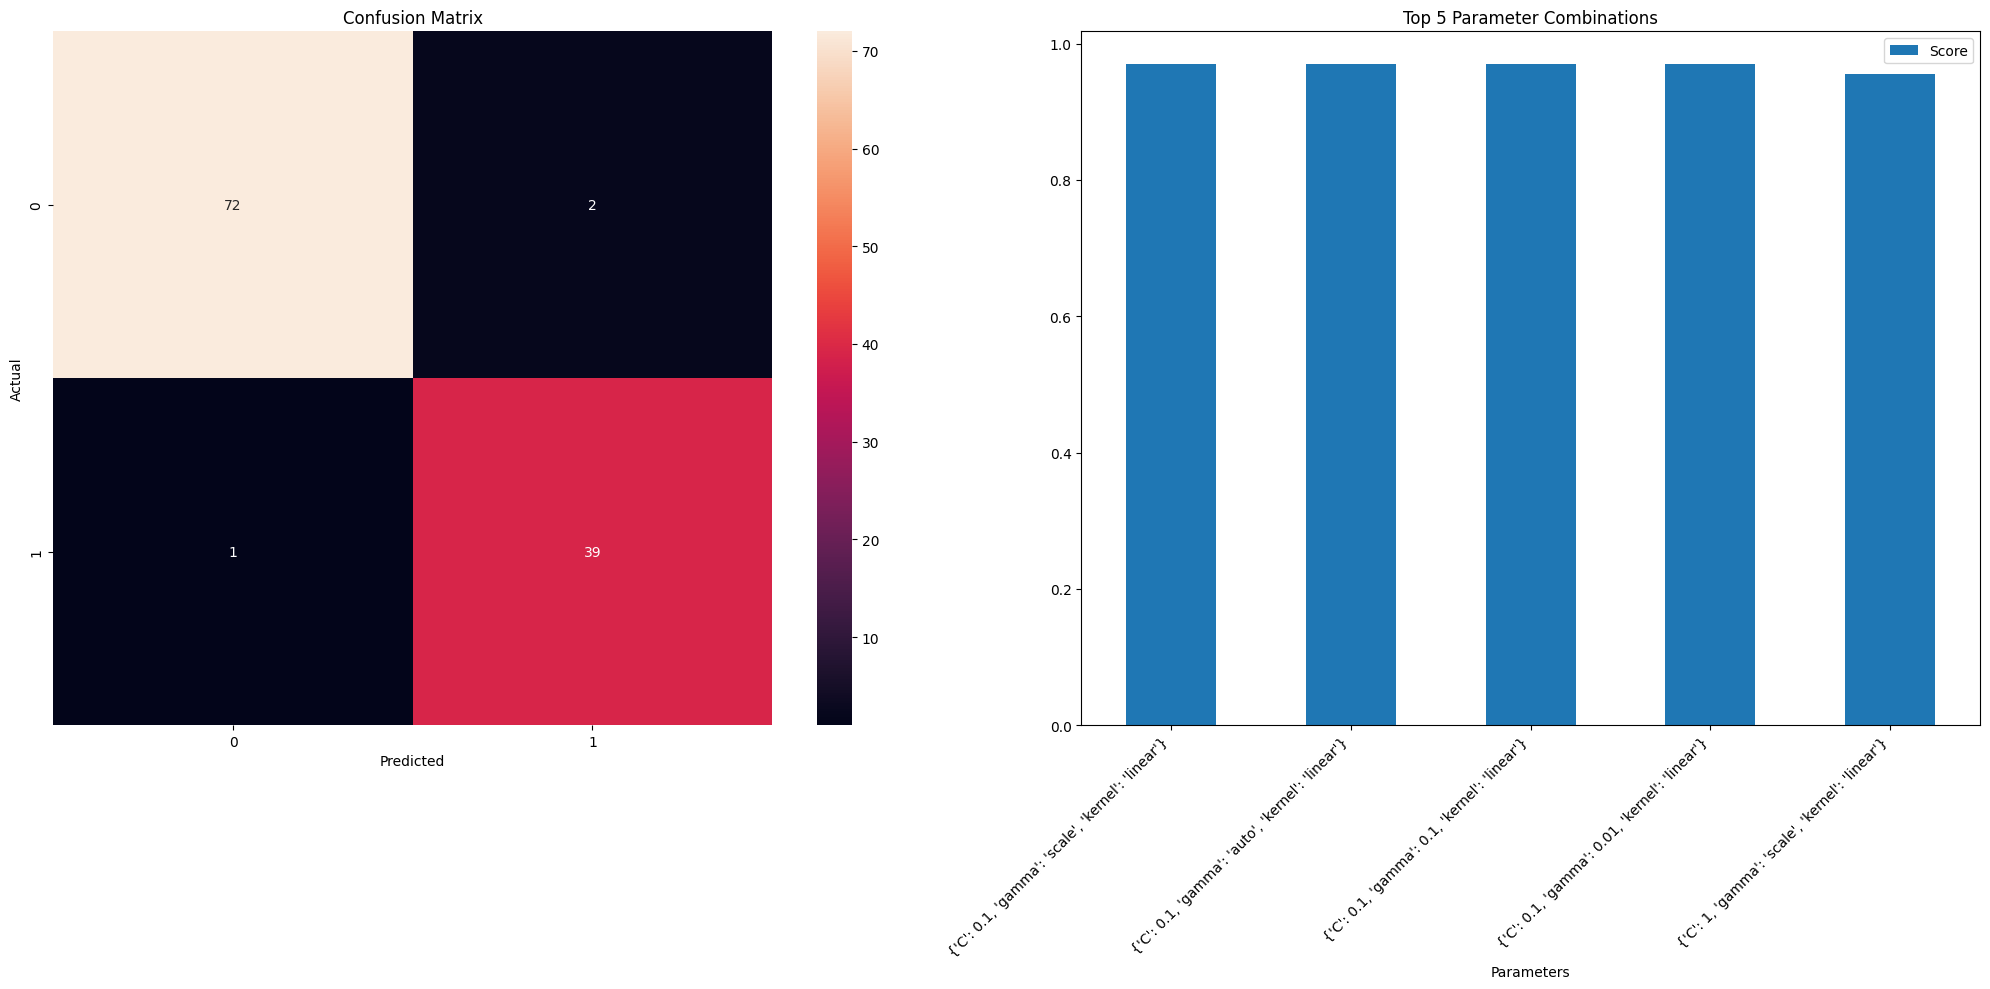

In [15]:
custom_params_svm = {
        'C': [0.1, 1, 10],
        'kernel': ['linear'],
        'gamma': ['scale', 'auto', 0.1, 0.01]
}

results_svm = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'svm', custom_param_grid=custom_params_svm)

print("\nBest Parameters:", results_svm['best_parameters'])
print("\nBest Cross-validation Score:", results_svm['best_score'])
print("\nFeature Importances:", results_svm['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_svm['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [16]:
svm = SVC(**results_svm['best_parameters'])

sbs_svm = SequentialBackwardSelection(estimator=svm,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_svm.fit(X_train, X_test, y_train, y_test)


Removed feature: feature3
Current performance: 0.97368
Remaining features: ['feature2', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature6
Current performance: 0.98246
Remaining features: ['feature2', 'feature4', 'feature5', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature2
Current performance: 0.98246
Remaining features: ['feature4', 'feature5', 'feature7', 'fe

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/soulangel443/.local/share/mise/installs/python/latest/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Parameters: {'epochs': 350, 'learning_rate': 1e-05, 'random_state': 13, 'verbose': False}

Best Cross-validation Score: 0.9203749572817369

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        74
           1       0.90      0.90      0.90        40

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



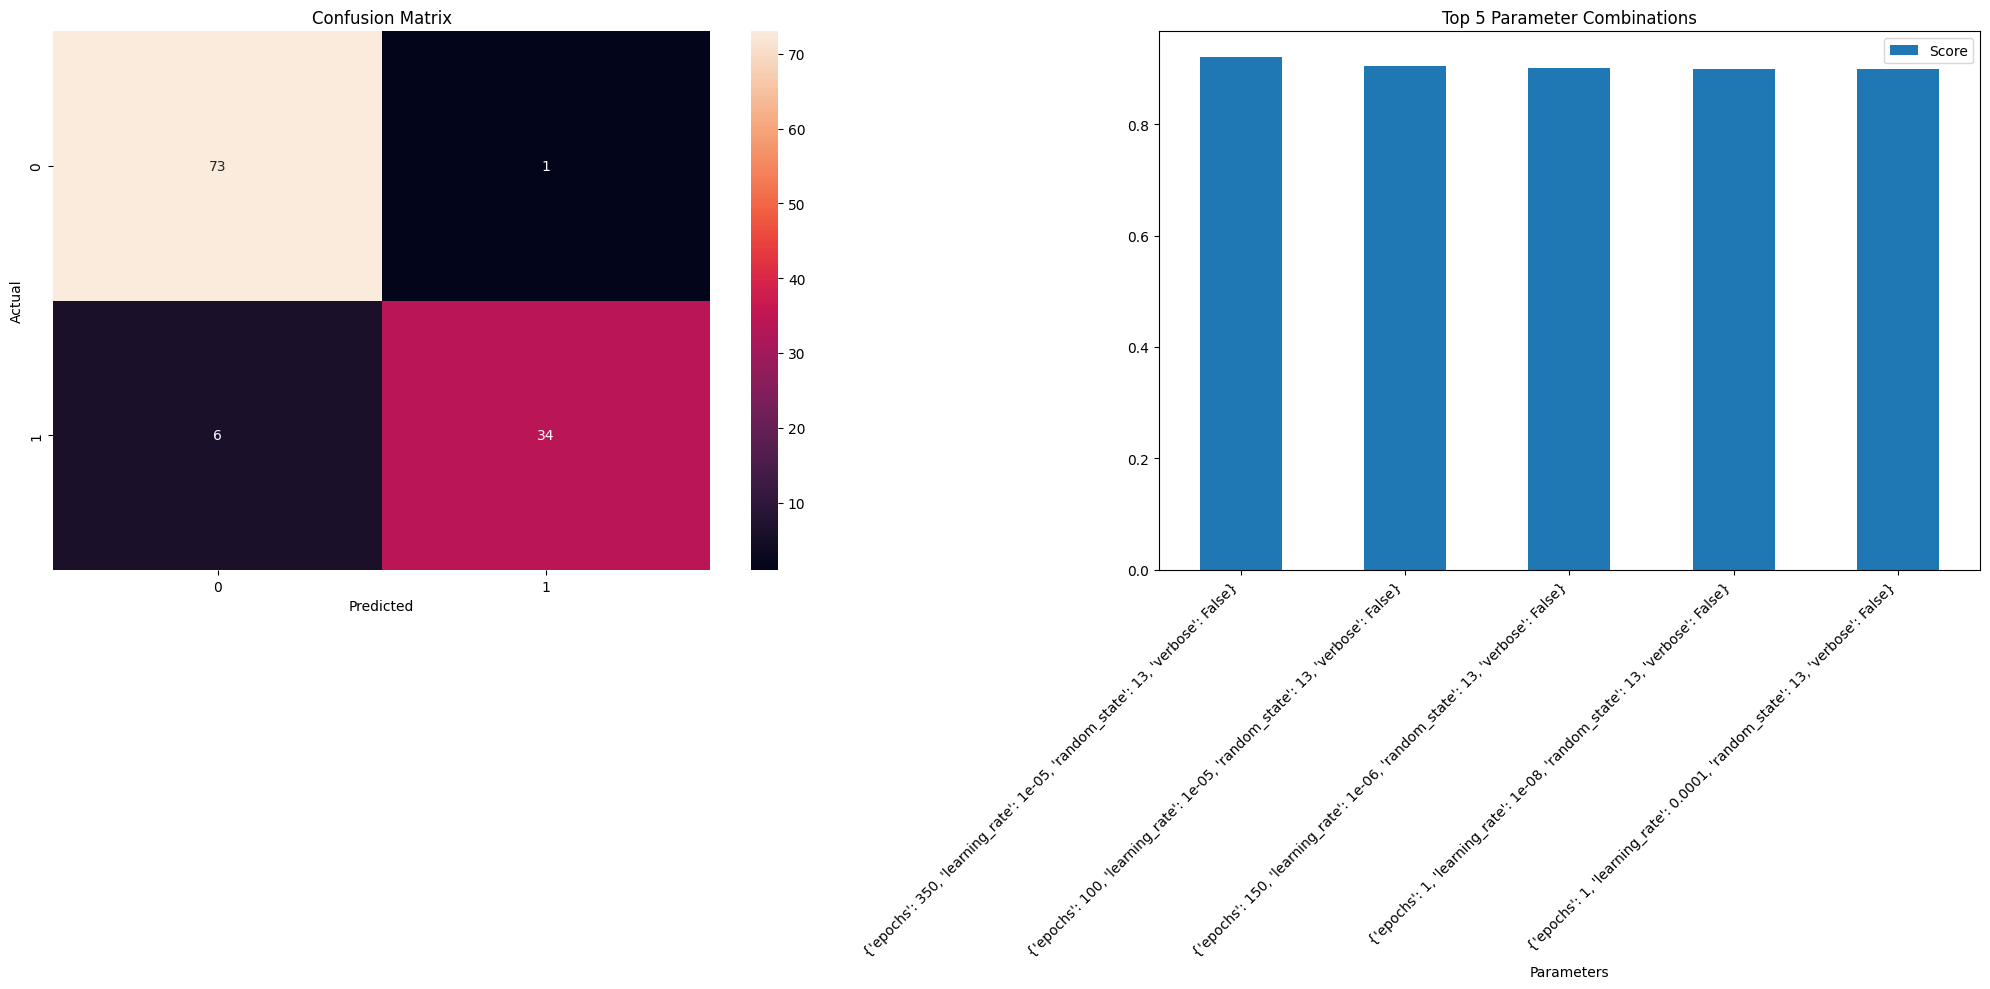

In [17]:
custom_params_mpa = {
  'learning_rate' : [1e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03],
  'epochs': [1, 5, 10, 50, 75, 100, 150, 350],
  'verbose': [False],
  'random_state':[13]
}

results_mpa = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'mpa', custom_param_grid=custom_params_mpa)

print("\nBest Parameters:", results_mpa['best_parameters'])
print("\nBest Cross-validation Score:", results_mpa['best_score'])
print("\nFeature Importances:", results_mpa['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_mpa['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [18]:
mpa_classifier = mpa(**results_mpa['best_parameters'])

sbs_mpa = SequentialBackwardSelection(estimator=mpa_classifier,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_mpa.fit(X_train, X_test, y_train, y_test)


Removed feature: feature18
Current performance: 0.97368
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature27
Current performance: 0.97368
Remaining features: ['feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature28', 'feature29', 'feature30', 'feature31']


Removed feature: feature8
Current performance: 0.96491
Remaining features: ['feature2', 'feature3', 'feature4', 'fea